**DECİSİON TREE** **MODELİ**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Veri setini oku
df = pd.read_excel('/content/drive/MyDrive/sade1.xlsx')

# Marka ve kategori arasındaki ilişkiyi gösteren bir sözlük oluştur
marka_kategori_iliskisi = {}

# Veri setindeki her satırı dolaş
for index, row in df.iterrows():
    marka = row['marka']  # Marka sütunundan marka adını al
    kategori = row['kategori']  # Kategori sütunundan kategori adını al

    # Marka daha önce sözlükte yoksa, yeni bir giriş oluştur
    if marka not in marka_kategori_iliskisi:
        marka_kategori_iliskisi[marka] = set()  # Kategorileri depolamak için bir küme kullan

    # Kategorileri kümeye ekle, ancak önce stringe dönüştür
    marka_kategori_iliskisi[marka].add(str(kategori)) # Changed here

# Sonuçları yazdır
for marka, kategoriler in marka_kategori_iliskisi.items():
    print(f"{marka} markası şu kategorilerden sipariş verdi: {', '.join(kategoriler)}")

0 markası şu kategorilerden sipariş verdi: 0, 2, 1, 3
1 markası şu kategorilerden sipariş verdi: 0, 1, 2, 3
2 markası şu kategorilerden sipariş verdi: 0, 1, 2, 3


In [ ]:
# gerekli kütüphaneleri yükle
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#değişkenleri belirle
X = df[['marka', 'kategori']]  # Bağımsız değişkenler
y = df['siparişmiktarı']  # Bağımlı değişken

# Veriyi eğitim ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Karar ağacı regresyon modelini oluşturun
model = DecisionTreeRegressor(random_state=42)

# Modeli eğitim verileriyle eğitin
model.fit(X_train, y_train)

# Test verileriyle tahmin yapma
y_pred = model.predict(X_test) # This line is added to calculate predictions

# Ortalama karesel hata (MSE) ile model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
print(f"Ortalama Karesel Hata (MSE): {mse}")

Ortalama Karesel Hata (MSE): 956804.9228569355


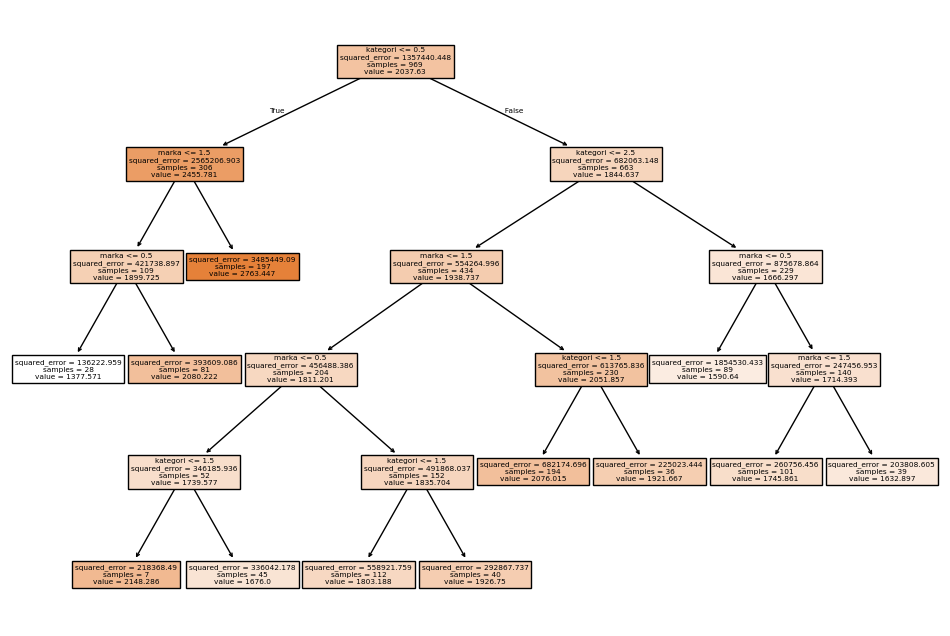

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8)) # şeklin boyut ölçüleri
plot_tree(model, feature_names=['marka', 'kategori'], filled=True)
plt.show()

In [ ]:
# Test verileriyle tahmin yapma
y_pred = model.predict(X_test)

In [ ]:
!pip install pd

In [ ]:
# Tahminleme Yapma
# Yeni veriler için bir DataFrame oluşturma:
yeni_veri = pd.DataFrame({'marka': ['1'], 'kategori': ['3']}) # yeni_veri'yi örnek verilerle tanımlıyoruz

# Şimdi yeni_veri'yi tahmin için kullanabiliriz
def siparis_miktari_tahmin_et(marka, kategori):
    yeni_veri = pd.DataFrame({'marka': [marka], 'kategori': [kategori]})
    tahmin = model.predict(yeni_veri)[0]
    return tahmin

In [ ]:
# Örnek Tahminleme:
tahmin_edilen_miktar = siparis_miktari_tahmin_et('1', '3')  # Örnek marka ve kategori değerleri
print(f"Marka: 1, Kategori: 3 için tahmin edilen sipariş miktarı: {tahmin_edilen_miktar}")
tahmin_edilen_miktar = siparis_miktari_tahmin_et('0', '2')  # Örnek marka ve kategori değerleri
print(f"Marka: 0, Kategori: 2 için tahmin edilen sipariş miktarı: {tahmin_edilen_miktar}")

Marka: 1, Kategori: 3 için tahmin edilen sipariş miktarı: 1745.8613861386139
Marka: 0, Kategori: 2 için tahmin edilen sipariş miktarı: 1676.0


In [ ]:
!pip install gradio # Install the gradio library
import gradio as gr # Import the gradio library and assign it to 'gr'

def tahmin_et(marka, kategori):
    # Girdi verilerini DataFrame'e dönüştürün
    input_data = pd.DataFrame({'marka': [marka], 'kategori': [kategori]})

    # Tahmini yapın
    tahmin = model.predict(input_data)[0]

    # Tahmin sonucunu döndürün
    return f"Tahmin Edilen Sipariş Miktarı: {tahmin}"

iface = gr.Interface(
    fn=tahmin_et,  # Tahmin fonksiyonunu belirtin
    inputs=[
        gr.Number(label="Marka"),  # Sayısal girdi için Number
        gr.Number(label="Kategori")  # Sayısal girdi için Number
    ],
    outputs="text",  # Çıkış türü metin
    title="Decision Tree Tahmini",  # Arayüz başlığı
    description="Marka ve kategori girerek sipariş miktarını tahmin edin."  # Arayüz açıklaması
)

iface.launch()  # Arayüzü başlatın

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0f1b10ba099744cf5e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
